<a href="https://colab.research.google.com/github/chetan-ade/FYP/blob/master/WindSpeed_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import datetime
from datetime import date

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
df = pd.read_csv('gdrive/My Drive/tarapur_preprocessed.csv')
df.head()

,Unnamed: 0,date,day,month,WindDir,WindspeedKmph
0,0,2008-07-01,1,7,SW,25
1,1,2008-07-02,2,7,SW,26
2,2,2008-07-03,3,7,SW,22
3,3,2008-07-04,4,7,SW,22
4,4,2008-07-05,5,7,SW,22


In [0]:
data = pd.DataFrame(
    columns=['day', 'month', 'WindSpeed']
)

In [5]:
data['day'] = df['day']
data['month'] = df['month']
data['WindSpeed'] = df['WindspeedKmph']
data.head()

,day,month,WindSpeed
0,1,7,25
1,2,7,26
2,3,7,22
3,4,7,22
4,5,7,22


In [6]:
data.describe()

,day,month,WindSpeed
count,4290.000000,4290.000000,4290.000000
mean,15.724009,6.556876,13.044289
std,8.798265,3.476216,5.010215
min,1.000000,1.000000,4.000000
25%,8.000000,3.000000,10.000000
50%,16.000000,7.000000,12.000000
75%,23.000000,10.000000,15.000000
max,31.000000,12.000000,45.000000


In [0]:
x = data.iloc[:, :-1]
y = data['WindSpeed']

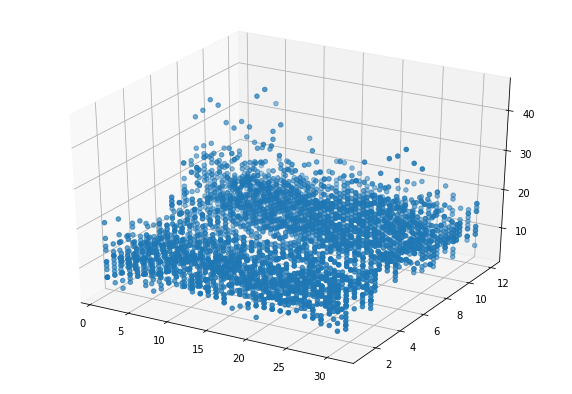

In [8]:
fig = plt.figure()
fig.set_size_inches(10, 7)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=x.day, ys=x.month, zs=y)

(array([ 588., 1803., 1075.,  427.,  258.,   88.,   27.,   16.,    6.,
           2.]),
 array([ 4. ,  8.1, 12.2, 16.3, 20.4, 24.5, 28.6, 32.7, 36.8, 40.9, 45. ]),
 <a list of 10 Patch objects>)

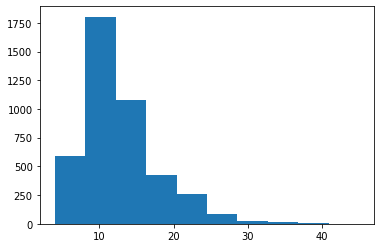

In [9]:
plt.hist(y)

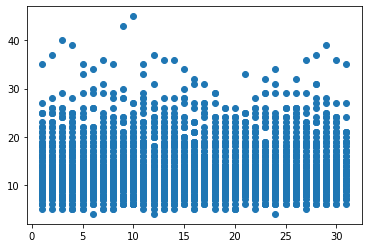

In [10]:
plt.scatter(x.day, y)
plt.rcParams["figure.figsize"] = (5,10)
plt.show()

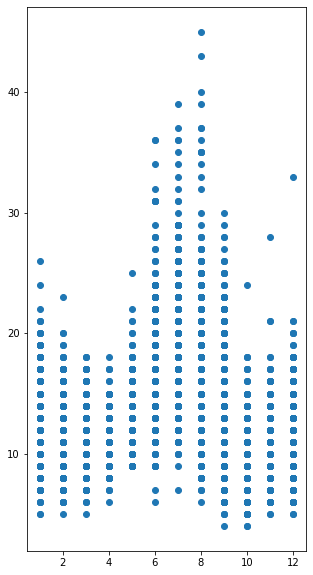

In [11]:
plt.scatter(x.month, y)
plt.rcParams["figure.figsize"] = (7,5)
plt.show()

In [12]:
data

,day,month,WindSpeed
0,1,7,25
1,2,7,26
2,3,7,22
3,4,7,22
4,5,7,22
...,...,...,...
4285,25,3,11
4286,26,3,9
4287,27,3,13
4288,28,3,18


In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=4)

In [0]:
svr = SVR(kernel='rbf', gamma='auto', C=100.0, epsilon=2.2, verbose=1)

In [15]:
svr.fit(xtrain, ytrain)

[LibSVM]

SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=2.2, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=1)

In [16]:
p = svr.predict(xtest)
p

array([11.19972412, 11.19985688, 11.19999415, 17.20036175, 12.20029785,
       10.80035446, 12.7995716 , 10.86757606, 13.7999027 , 11.79999407,
       10.79988623, 11.20006773, 10.62371907, 10.41572361, 21.7999651 ,
       16.20037688, 20.12229688, 14.20005607, 14.20010356, 11.80022857,
       10.20000043, 11.8001485 , 10.20048758, 12.80037108, 10.79987879,
       13.20001506, 13.30899047, 18.80005002, 14.20019531, 10.80031084,
       11.19994276,  8.79949978, 13.79997777, 11.19963856, 10.79961647,
        9.80033452, 14.20010356, 12.20011271, 13.20011843, 17.79972019,
       10.19971934, 11.62500759, 11.19983314, 20.79961236, 12.7995716 ,
       11.08348995, 10.19976357, 10.20036763, 19.1996986 , 14.19977834,
       22.19954419,  8.79949978, 11.19995351, 11.19995351, 19.80005814,
       20.20027941, 11.19963856, 10.19974757, 11.08348995, 11.80011572,
        9.51902125, 13.30899047, 10.80023045, 11.79963265, 10.6243428 ,
        9.20030554, 12.58224066, 17.6559184 , 18.80005002, 13.19

In [17]:
mean_squared_error(ytest, p)

16.694701441245062

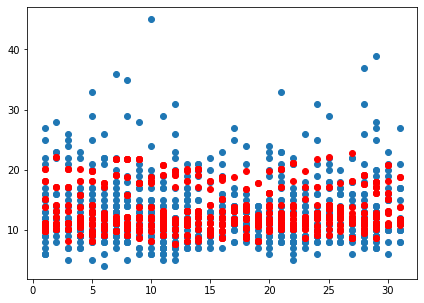

In [18]:
plt.scatter(xtest.day, ytest)
plt.scatter(xtest.day, p, color='red')
plt.show()

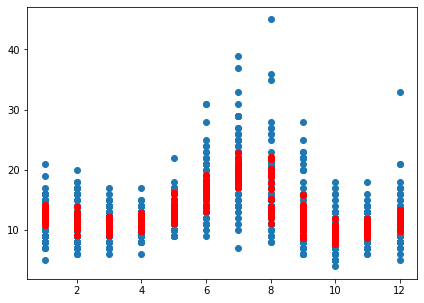

In [19]:
plt.scatter(xtest.month, ytest,)
plt.scatter(xtest.month, p, color='red')
plt.show()

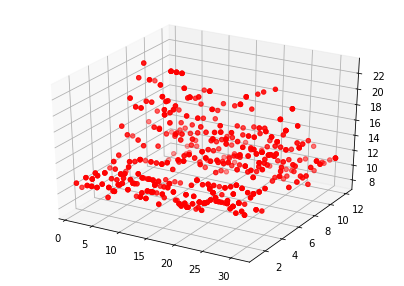

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=xtest.day, ys=xtest.month, zs=p, c='red')

(array([ 64., 171., 308., 114.,  42.,  17.,  62.,  36.,  25.,  19.]),
 array([ 7.79993814,  9.29998244, 10.80002673, 12.30007102, 13.80011532,
        15.30015961, 16.8002039 , 18.3002482 , 19.80029249, 21.30033678,
        22.80038108]),
 <a list of 10 Patch objects>)

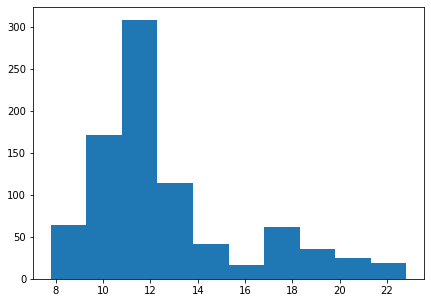

In [21]:
plt.hist(p)

In [0]:
scaler = MinMaxScaler(feature_range=(4, 40))

In [0]:
pred = p.reshape(-1, 1)

In [24]:
pred = scaler.fit_transform(pred)
pred

array([[12.1592454 ],
       [12.15956403],
       [12.15989347],
       [26.56035047],
       [14.56055145],
       [11.20078652],
       [15.99876598],
       [11.3621136 ],
       [18.39948974],
       [13.59985075],
       [11.19966282],
       [12.16007005],
       [10.77687411],
       [10.27769976],
       [37.59907254],
       [24.16045764],
       [33.57278772],
       [19.35982948],
       [19.35994345],
       [13.60041353],
       [ 9.75997941],
       [13.60022139],
       [ 9.76114854],
       [16.00068468],
       [11.19964496],
       [16.9598019 ],
       [17.22133517],
       [30.39948896],
       [19.36016363],
       [11.20068184],
       [12.15977013],
       [ 6.39887709],
       [18.3996699 ],
       [12.15904008],
       [11.19901541],
       [ 8.80080955],
       [19.35994345],
       [14.56010714],
       [16.96004999],
       [27.99876825],
       [ 9.75930481],
       [13.17989561],
       [12.15950704],
       [35.19829687],
       [15.99876598],
       [11

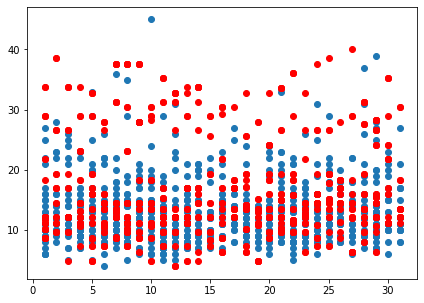

In [25]:
plt.scatter(xtest.day, ytest)
plt.scatter(xtest.day, pred, color='red')
plt.show()

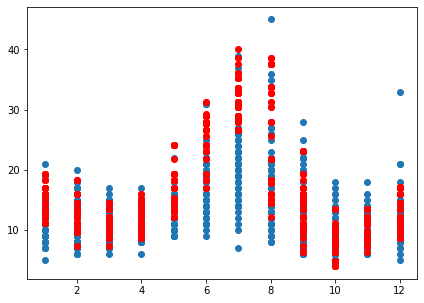

In [26]:
plt.scatter(xtest.month, ytest,)
plt.scatter(xtest.month, pred, color='red')
plt.show()

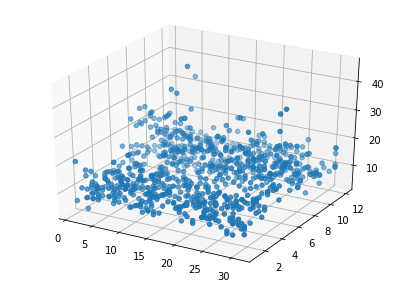

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=xtest.day, ys=xtest.month, zs=ytest)

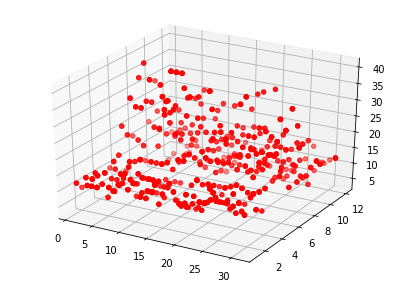

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=xtest.day, ys=xtest.month, zs=pred, c='red')

(array([121., 374., 209.,  76.,  46.,  18.,   7.,   4.,   2.,   1.]),
 array([ 4. ,  8.1, 12.2, 16.3, 20.4, 24.5, 28.6, 32.7, 36.8, 40.9, 45. ]),
 <a list of 10 Patch objects>)

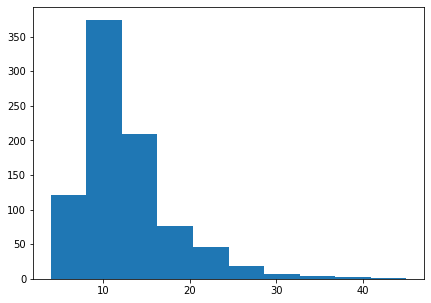

In [29]:
plt.hist(ytest)

(array([ 64., 171., 308., 114.,  42.,  17.,  62.,  36.,  25.,  19.]),
 array([ 4. ,  7.6, 11.2, 14.8, 18.4, 22. , 25.6, 29.2, 32.8, 36.4, 40. ]),
 <a list of 10 Patch objects>)

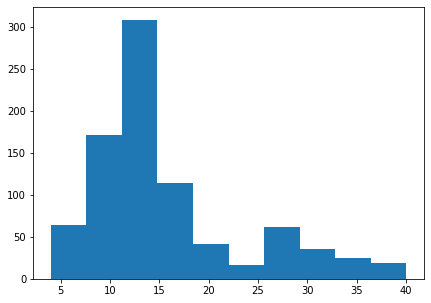

In [30]:
plt.hist(pred)

In [31]:
pred = pred.round()
pred = pred.astype('int32')
pred

array([[12],
       [12],
       [12],
       [27],
       [15],
       [11],
       [16],
       [11],
       [18],
       [14],
       [11],
       [12],
       [11],
       [10],
       [38],
       [24],
       [34],
       [19],
       [19],
       [14],
       [10],
       [14],
       [10],
       [16],
       [11],
       [17],
       [17],
       [30],
       [19],
       [11],
       [12],
       [ 6],
       [18],
       [12],
       [11],
       [ 9],
       [19],
       [15],
       [17],
       [28],
       [10],
       [13],
       [12],
       [35],
       [16],
       [12],
       [10],
       [10],
       [31],
       [19],
       [39],
       [ 6],
       [12],
       [12],
       [33],
       [34],
       [12],
       [10],
       [12],
       [14],
       [ 8],
       [17],
       [11],
       [14],
       [11],
       [ 7],
       [15],
       [28],
       [30],
       [17],
       [30],
       [15],
       [14],
       [16],
       [12],
       [12],
       [ 7],

In [32]:
mean_squared_error(ytest, pred)

48.235431235431236

In [0]:
pred_data = pd.DataFrame(
    columns=['day', 'month', 'Pred_windSpeed']
)

In [34]:
pred_data['day'] = xtest['day']
pred_data['month'] = xtest['month']
pred_data['Pred_windSpeed'] = pred
pred_data

,day,month,Pred_windSpeed
3838,3,1,12
3801,27,11,12
1682,7,2,12
3288,2,7,27
3961,6,5,15
...,...,...,...
2038,29,1,15
3510,9,2,18
2968,16,8,22
2852,22,4,14


In [0]:
last_date = df['date'].iloc[-1]
last_date = datetime.datetime.strptime(last_date, "%Y-%m-%d").date()

pred_date = []
for i in range(1, 91):
    pred_date.append(last_date + datetime.timedelta(days=i))

pred_input = [[] for i in range(90)]
i = 0
for j in pred_date:
    pred_input[i].append(j.day)
    pred_input[i].append(j.month)
    i += 1

In [36]:
sample = pd.DataFrame(
    columns=['day', 'month'],
    data=pred_input
)
sample

,day,month
0,30,3
1,31,3
2,1,4
3,2,4
4,3,4
...,...,...
85,23,6
86,24,6
87,25,6
88,26,6


In [37]:
sample_p = svr.predict(sample)
sample_p

array([10.80031609, 10.80035352, 10.38632066, 11.19982208, 11.20032401,
       10.68908797, 11.20037319, 10.19975958,  9.8503449 , 10.80030404,
       10.79962206, 10.80015614, 10.79962409, 10.21490894, 10.80023045,
       11.1997079 , 11.20014444,  9.79992127, 11.19983314, 12.03066475,
       11.58867451, 11.80011943, 11.8000795 , 11.80027553, 11.79985677,
       12.09582676, 12.44778632, 12.19984974, 11.80024135, 11.79967147,
       12.20015864, 12.80002254, 11.19984842, 12.2002868 , 12.19977878,
       11.62500759, 11.79994247, 12.20029785, 12.1999919 , 12.20000088,
       12.20020255, 12.19956741, 12.54220212, 11.80011184, 13.19950556,
       13.20035113, 14.19957111, 13.199892  , 13.20026473, 14.20010356,
       13.80047404, 14.19978221, 14.20023676, 14.19977834, 15.19972869,
       14.20031764, 14.19966096, 13.7999027 , 13.79983351, 14.20019531,
       16.19961578, 16.20032724, 13.80000868, 15.20031837, 14.19990069,
       14.20019295, 13.80001362, 13.19964034, 14.4071922 , 14.79

In [0]:
sample_p = sample_p.round()
sample_p = sample_p.astype('int32')

In [42]:
pred_data = pd.read_csv('gdrive/My Drive/tarapur.csv')
pred_data['speed'].iloc[-90:] = sample_p
pred_data.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Unnamed: 0,date,direction,speed
4375,85,2020-06-23,206,17.0
4376,86,2020-06-24,237,17.0
4377,87,2020-06-25,242,17.0
4378,88,2020-06-26,245,18.0
4379,89,2020-06-27,227,18.0


In [0]:
pred_data.to_csv('gdrive/My Drive/tarapur.csv')